# EDA - Insurance Company Benchmark (COIL 2000)

### Contexto del negocio

Este dataset proviene del CoIL Challenge 2000, organizado por la empresa holandesa Sentient Machine Research. El objetivo fue desarrollar modelos de minería de datos para identificar qué clientes de una aseguradora tienen mayor probabilidad de contratar un seguro de caravanas (mobile home policies). Esto refleja un caso real de negocio en el sector asegurador: optimizar campañas de marketing dirigidas a clientes con alta probabilidad de compra.

### Descripción del dataset

- Número de instancias: 9,000 clientes: Entrenamiento: 5,822 Y Evaluación: 4,000

Número de atributos: 86 variables

- Sociodemográficos (1-43): derivados de códigos postales (ej. tipo de vivienda, distribución demográfica).

- Uso de productos (44-85): información de posesión de seguros previos y productos financieros.

- Variable objetivo (86): CARAVAN → número de pólizas de seguro de caravanas (0/1).

- Tareas asociadas: Clasificación, Regresión, Segmentación de clientes.

- Tipo de datos: Categóricos e integer.

Formato: Archivos .txt delimitados por tabuladores.


### Referencias

- Van der Putten, P., & Van Someren, M. (2000). CoIL Challenge 2000: The Insurance Company Case. Sentient Machine Research, Amsterdam.
- Disponible en: UCI Machine Learning Repository

In [2]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Setting up tweaks for the visualization
sns.set(style="whitegrid")

## Carga de información

In [4]:
# Nota @Mls: Cambiar el path a tu equipo local. 
path = '../data/insurance_company_original.csv'
insurance_df = pd.read_csv(path, header=None)
insurance_df.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37,1,2,2,8,1,4,1.0,4.0,6,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
2,37,1,2,2,8,0,4,2.0,4.0,3,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9,1,3,3,3,2,3,2.0,4.0,5,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40,1,4,2,10,1,4,1.0,4.0,7,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00


In [5]:
# Definir los nombres de las columnas basadas en el diccionario
column_names = [
    "CSubType", "NumHouse", "AvgSzHouse", "AvgAge", "CMainType",
    "DemCatholic", "DemProtestant", "DemOthReligion", "DemNoReligion",
    "DemMarried", "DemCohabitation", "DemOtherRelation", "DemSingles",
    "DemNoChild", "DemWithChild", "DemHiLeEdu", "DemMiLeEdu", "DemLoLeEdu",
    "DemHiStatus", "DemEntrepreneur", "DemFarmer", "DemMidManager",
    "DemSkilledLab", "DemUnskilledLab", "DemSocClassA", "DemSocClassB1",
    "DemSocClassB2", "DemSocClassC", "DemSocClassD", "DemRenter",
    "DemHomeOwner", "Dem1Car", "Dem2Car", "Dem0Car", "DemPubHthInsur",
    "DemPrivHthInsur", "DemLowestInc", "DemLowInc", "DemMidInc",
    "DemHighInc", "DemHighestInc", "DemAvgIncome", "DemPurchPowerC",
    "ContrPrivIns", "ContrPrivInsFirm", "ContrPrivInsAgr", "ContrCarPol",
    "ContrDeVanPol", "ContrMotPol", "ContrLorPol", "ContrTrailPol",
    "ContrTractPol", "ContrAgrMacPol", "ContrMopPol", "ContrLifePol",
    "ContrPrivAccPol", "ContrFamAccPol", "ContrDisPol", "ContrFirePol",
    "ContrSurfPol", "ContrBoatPol", "ContrBicPol", "ContrProPol",
    "ContrSSPol", "NumPrivIns", "NumPrivInsFirm", "NumPrivInsAgr",
    "NumCarPol", "NumDeVanPol", "NumMotPol", "NumLorPol", "NumTrailPol",
    "NumTractPol", "NumAgrMacPol", "NumMopPol", "NumLifePol",
    "NumPrivAccPol", "NumFamAccPol", "NumDisPol", "NumFirePol",
    "NumSurfPol", "NumBoatPol", "NumBicPol", "NumProPol", "NumSSPol",
    "MoHoPol"
]

# Aplicarlas al diccionario
insurance_df.columns = column_names

# Confirmar cambios
insurance_df.head()

,CSubType,NumHouse,AvgSzHouse,AvgAge,CMainType,DemCatholic,DemProtestant,DemOthReligion,DemNoReligion,DemMarried,...,NumPrivAccPol,NumFamAccPol,NumDisPol,NumFirePol,NumSurfPol,NumBoatPol,NumBicPol,NumProPol,NumSSPol,MoHoPol
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37,1,2,2,8,1,4,1.0,4.0,6,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
2,37,1,2,2,8,0,4,2.0,4.0,3,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9,1,3,3,3,2,3,2.0,4.0,5,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40,1,4,2,10,1,4,1.0,4.0,7,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CSubType          5822 non-null   int64  
 1   NumHouse          5822 non-null   int64  
 2   AvgSzHouse        5822 non-null   int64  
 3   AvgAge            5822 non-null   int64  
 4   CMainType         5822 non-null   int64  
 5   DemCatholic       5822 non-null   int64  
 6   DemProtestant     5822 non-null   int64  
 7   DemOthReligion    5822 non-null   float64
 8   DemNoReligion     5822 non-null   float64
 9   DemMarried        5822 non-null   int64  
 10  DemCohabitation   5822 non-null   float64
 11  DemOtherRelation  5822 non-null   float64
 12  DemSingles        5822 non-null   float64
 13  DemNoChild        5822 non-null   float64
 14  DemWithChild      5822 non-null   int64  
 15  DemHiLeEdu        5822 non-null   float64
 16  DemMiLeEdu        5822 non-null   float64


In [7]:
insurance_df.head().T

,0,1,2,3,4
CSubType,33.00,37.0,37.0,9.0,40.0
NumHouse,1.00,1.0,1.0,1.0,1.0
AvgSzHouse,3.00,2.0,2.0,3.0,4.0
AvgAge,2.00,2.0,2.0,3.0,2.0
CMainType,8.00,8.0,8.0,3.0,10.0
...,...,...,...,...,...
NumBoatPol,0.41,0.0,0.0,0.0,0.0
NumBicPol,0.42,0.0,0.0,0.0,0.0
NumProPol,0.43,0.0,0.0,0.0,0.0
NumSSPol,0.44,0.0,0.0,0.0,0.0


In [8]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CSubType,5822.0,24.253349,12.846706,1.0,10.0,30.0,35.0,41.0
NumHouse,5822.0,1.110615,0.405842,1.0,1.0,1.0,1.0,10.0
AvgSzHouse,5822.0,2.678805,0.789835,1.0,2.0,3.0,3.0,5.0
AvgAge,5822.0,2.991240,0.814589,1.0,2.0,3.0,3.0,6.0
CMainType,5822.0,5.773617,2.856760,1.0,3.0,7.0,8.0,10.0
...,...,...,...,...,...,...,...,...
NumBoatPol,5822.0,0.006082,0.081803,0.0,0.0,0.0,0.0,2.0
NumBicPol,5822.0,0.031848,0.211047,0.0,0.0,0.0,0.0,3.0
NumProPol,5822.0,0.007975,0.090632,0.0,0.0,0.0,0.0,2.0
NumSSPol,5822.0,0.014332,0.120125,0.0,0.0,0.0,0.0,2.0


## Exploracion y Analisis

In [9]:
# Verifica que MoHoPol exista y sea binaria
assert 'MoHoPol' in insurance_df.columns
insurance_df['MoHoPol'] = insurance_df['MoHoPol'].astype(int)
print(insurance_df.shape)

(5822, 86)


In [10]:
#Obtenemos la tasa de la clase objetivo
target_rate = insurance_df['MoHoPol'].mean()
print(f"Target rate (positivos): {target_rate:.4f}")

Target rate (positivos): 0.0598


In [11]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Separar características y objetivo
X = insurance_df.drop(columns=['MoHoPol'])
y = insurance_df['MoHoPol']

# Correlación (lineal)
corr = insurance_df.corr(numeric_only=True)['MoHoPol'].drop('MoHoPol').abs()

# Mutual Information (captura relaciones no lineales)
mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns)

# Combinar y normalizar
combined = pd.DataFrame({'Correlation': corr, 'Mutual_Info': mi_series})

# Normailzar cada columna a [0,1] para hacerlas comparables
combined_norm = (combined - combined.min()) / (combined.max() - combined.min())
combined['Score'] = combined_norm.mean(axis=1)

top10 = combined.sort_values('Score', ascending=False).head(10)
top10_features = top10.index.tolist()
top10

,Correlation,Mutual_Info,Score
ContrCarPol,0.150905,0.015891,1.000000
NumCarPol,0.144198,0.009940,0.790416
ContrFirePol,0.094434,0.008820,0.589360
DemAvgIncome,0.090182,0.008901,0.577748
DemMidInc,0.057686,0.009984,0.503538
DemLoLeEdu,0.090562,0.006498,0.503406
ContrPrivIns,0.096436,0.005571,0.493803
DemHiLeEdu,0.084628,0.006542,0.485004
DemLowestInc,0.079776,0.005083,0.422928
CMainType,0.069300,0.006026,0.417685


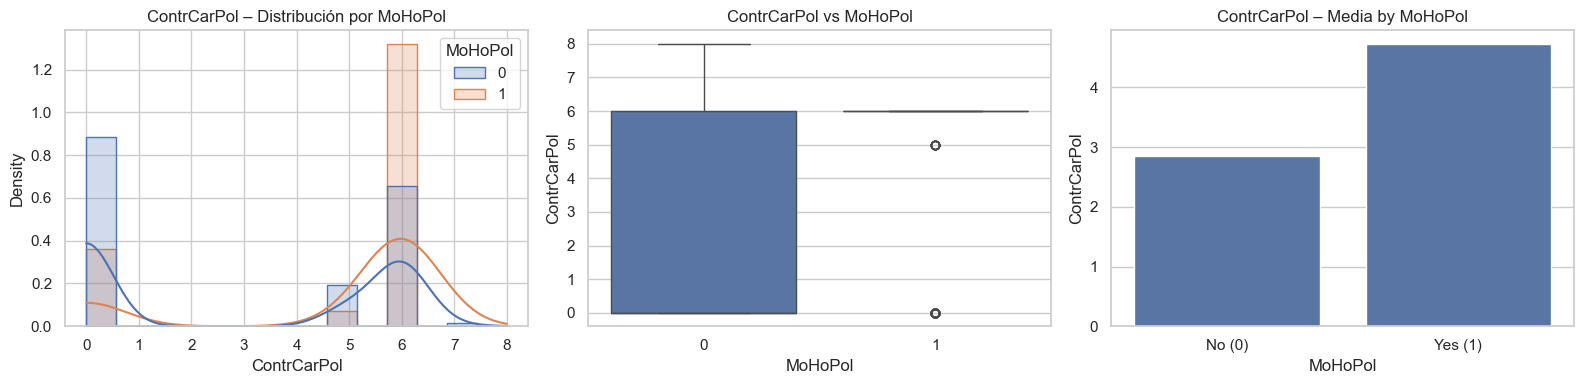

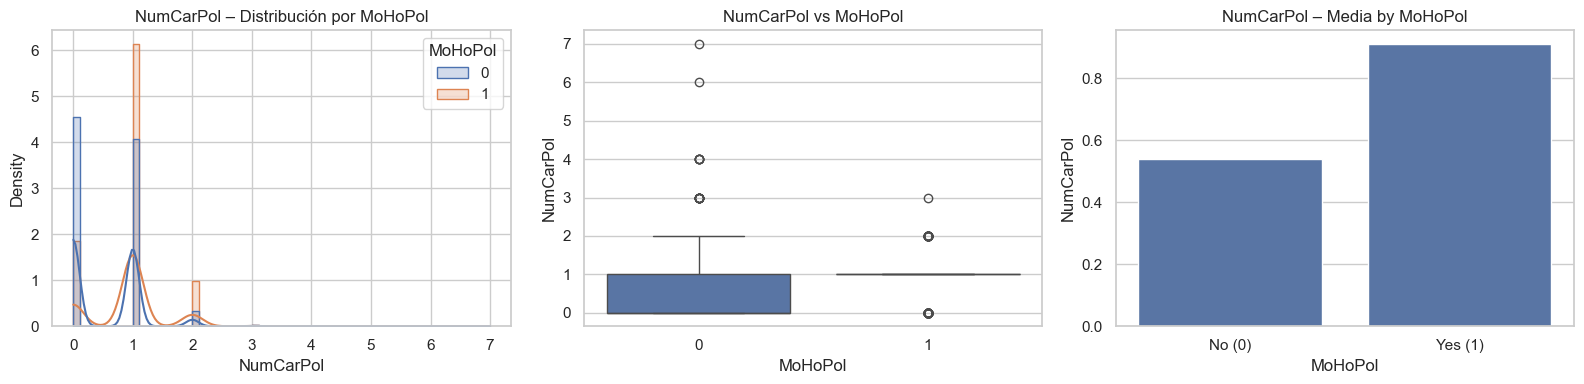

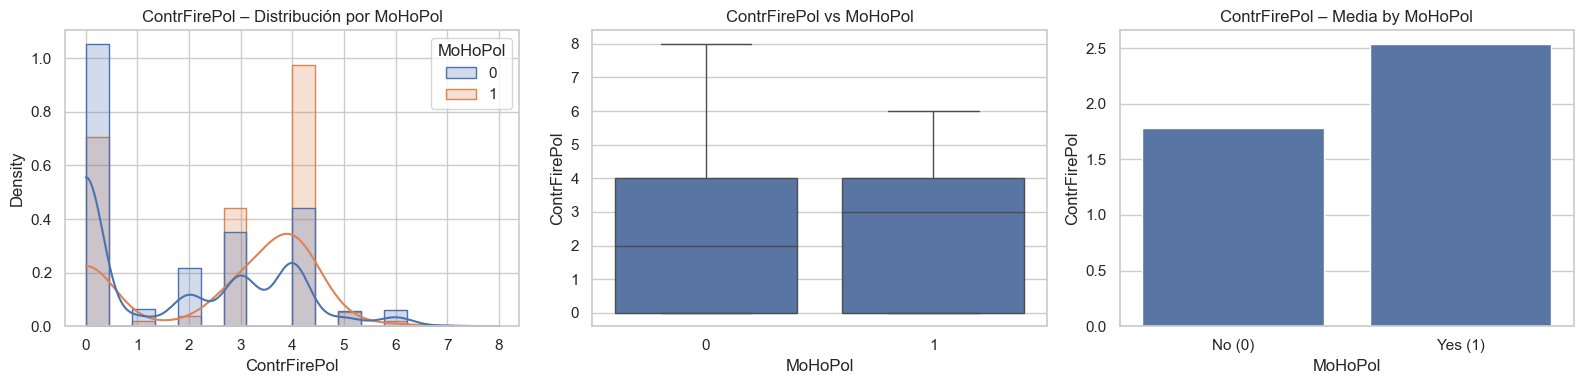

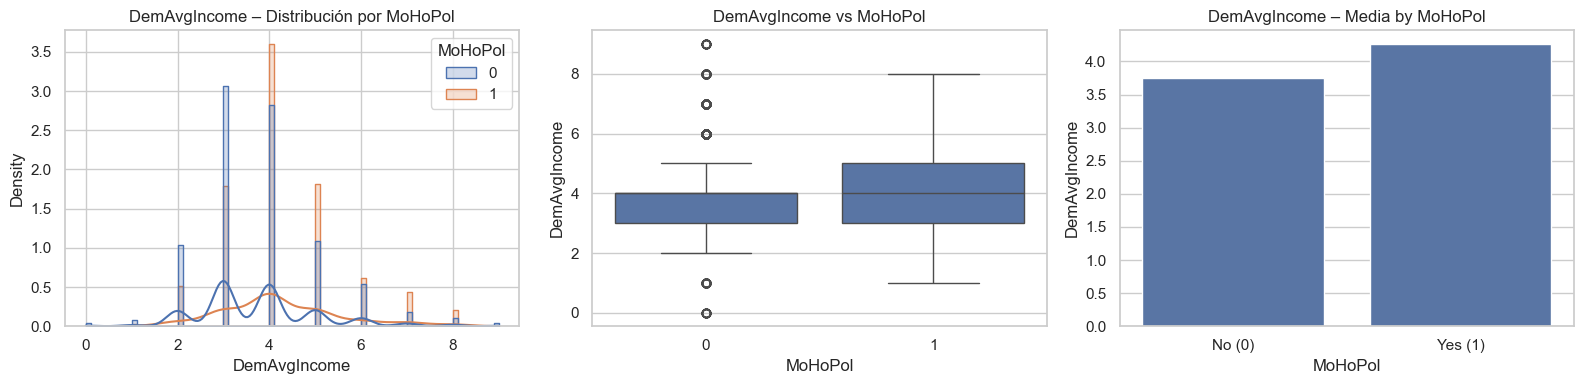

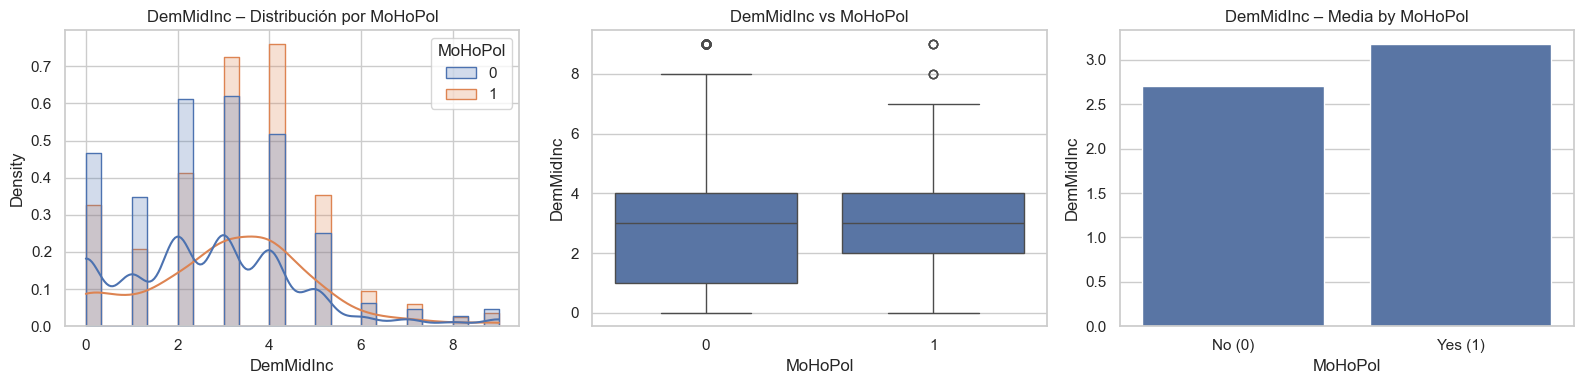

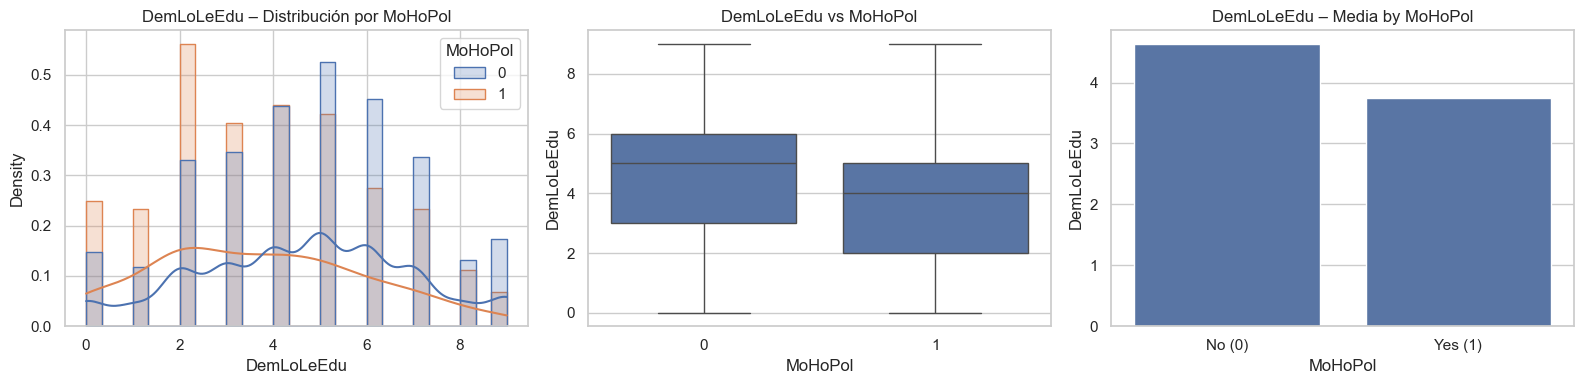

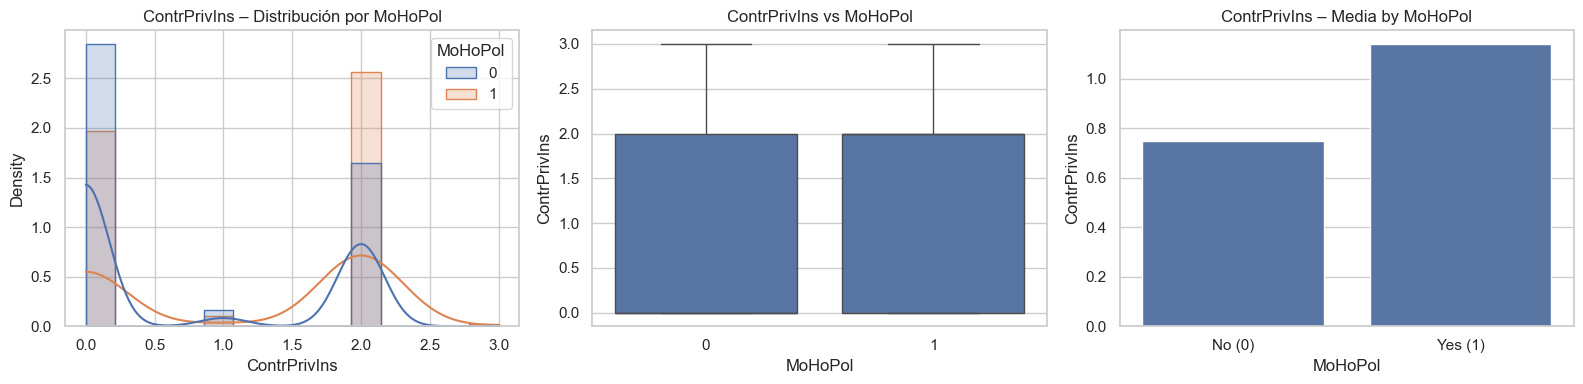

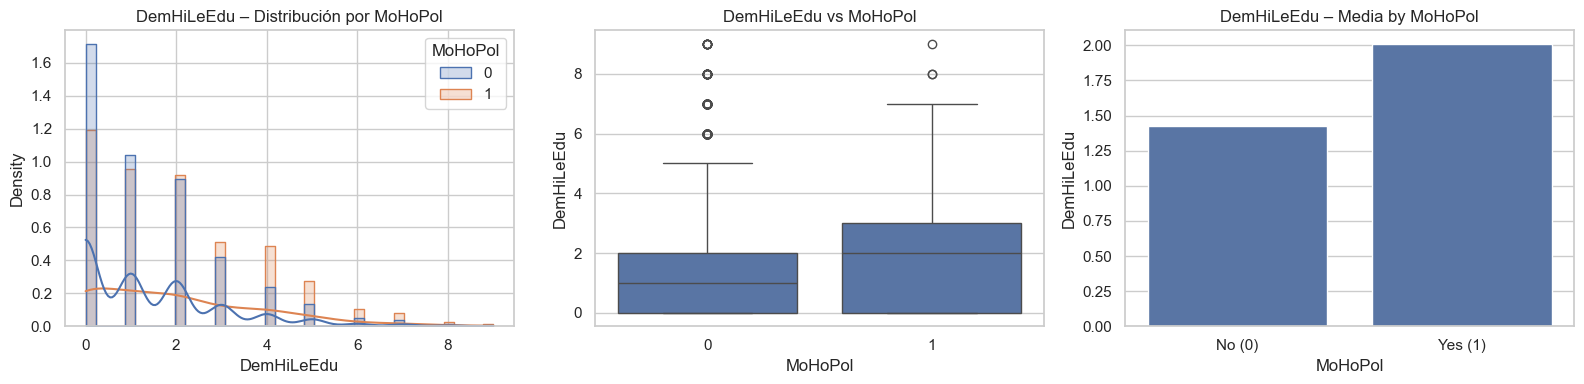

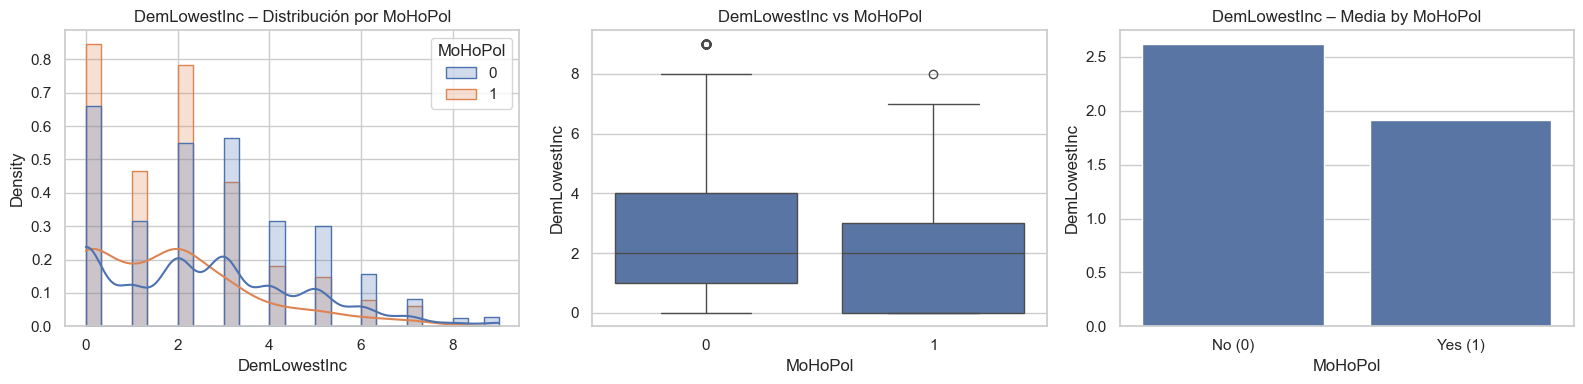

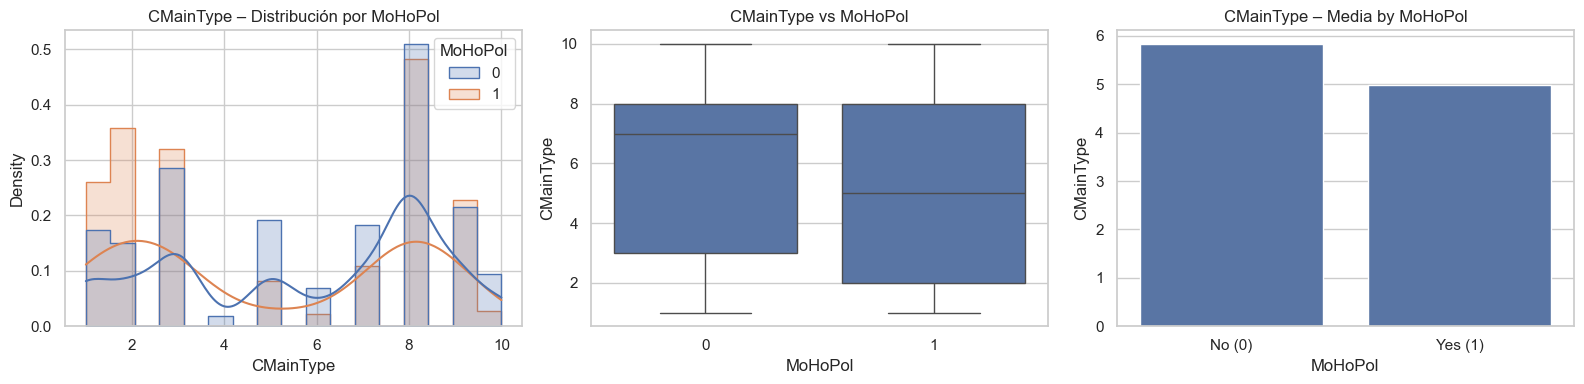

In [12]:
# Visualización de las top 10 características
def plot_feature_set(df, feat, target='MoHoPol'):
    fig, axes = plt.subplots(1, 3, figsize=(16,4))

    # 1) Distribución (general + por objetivo)
    sns.histplot(data=df, x=feat, hue=target, kde=True, ax=axes[0], element='step', stat='density', common_norm=False)
    axes[0].set_title(f"{feat} – Distribución por {target}")

    # 2) Boxplot vs target
    sns.boxplot(data=df, x=target, y=feat, ax=axes[1])
    axes[1].set_title(f"{feat} vs {target}")


    # 3) Media por clase
    means = df.groupby(target)[feat].mean().reset_index()
    sns.barplot(data=means, x=target, y=feat, ax=axes[2])
    axes[2].set_title(f"{feat} – Media by {target}")
    axes[2].set_xticks([0, 1])
    axes[2].set_xticklabels(['No (0)','Yes (1)'])

    plt.tight_layout()
    plt.show()

for f in top10_features:
    plot_feature_set(insurance_df, f, target='MoHoPol')

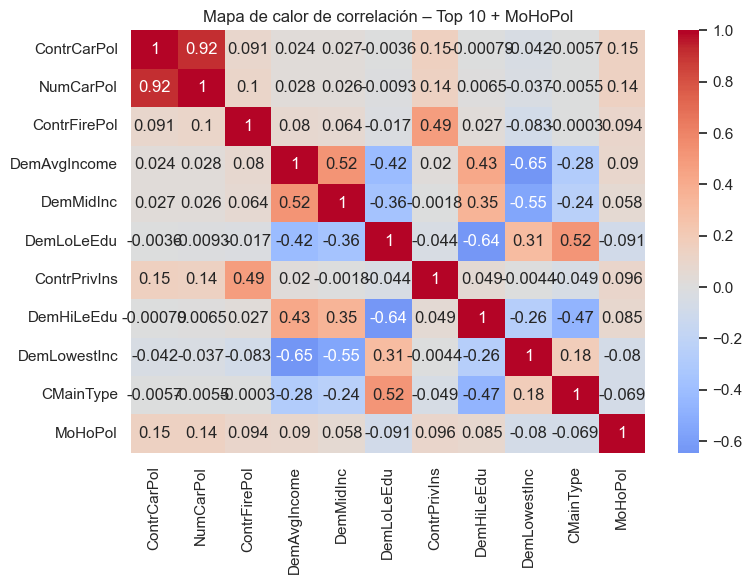

In [13]:
# Visualización de la matriz de correlación para las top 10 características + objetivo
plt.figure(figsize=(8,6))
sns.heatmap(insurance_df[top10_features + ['MoHoPol']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de calor de correlación – Top 10 + MoHoPol")
plt.tight_layout()
plt.show()

## Preprocesamiento

### Separación X / y // split estratificado

In [14]:
RANDOM_STATE = 42

X = insurance_df.drop(columns=['MoHoPol'])
# objetivo binario 0/1
y = insurance_df['MoHoPol'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("Train:", X_train.shape, " Test:", X_test.shape)
print("Positivos en train:", y_train.mean().round(4), " / test:", y_test.mean().round(4))

Train: (4657, 85)  Test: (1165, 85)
Positivos en train: 0.0597  / test: 0.0601


### Guardar datos de train y test

In [15]:
# Combinar X_train y y_train
train_df = X_train.copy()
train_df['MoHoPol'] = y_train

# Combinar X_test y y_test
test_df = X_test.copy()
test_df['MoHoPol'] = y_test

# Guardar a CSV
train_df.to_csv("../data/ml_data/insurance_train.csv", index=False)
test_df.to_csv("../data/ml_data/insurance_test.csv", index=False)

print("Archivos guardados correctamente:")
print("insurance_train.csv →", train_df.shape)
print("insurance_test.csv →", test_df.shape)

Archivos guardados correctamente:
insurance_train.csv → (4657, 86)
insurance_test.csv → (1165, 86)
